<h2 style='color:green' align='center'>My Friends Image Classification<h2>

### 1) Image cleaning and preprocessing

In [14]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from collections import defaultdict
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [15]:
cropped_image_path = "../images"

In [16]:
# scanning the image data directories
image_dirs = []
for dir in os.scandir(cropped_image_path):
        image_dirs.append(dir.path)

In [17]:
image_dirs

['../images\\Angelina Jolie',
 '../images\\Brad Pitt',
 '../images\\Jennifer Lawrence',
 '../images\\Johnny Depp',
 '../images\\Megan Fox',
 '../images\\Robert Downey Jr',
 '../images\\Sandra Bullock',
 '../images\\Tom Cruise',
 '../images\\Tom Hanks',
 '../images\\Will Smith']

Let's first create our functions for detecting face and eyes

[[ 21  18 197 197]]


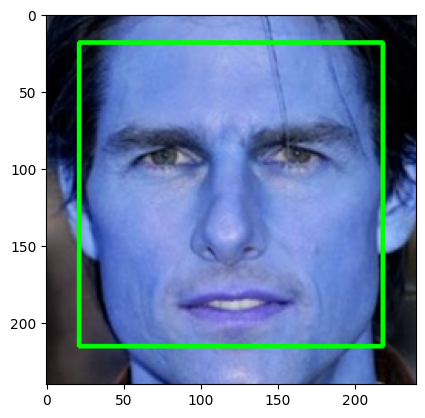

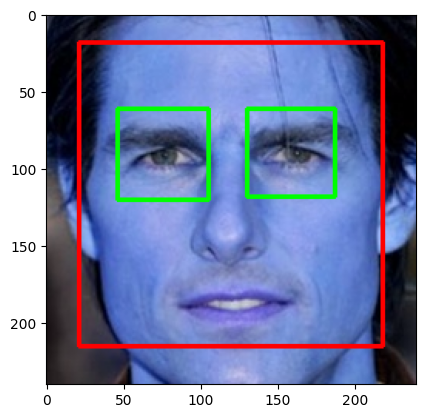

In [18]:
img = cv2.imread('../images/Tom Cruise/004_dc64d954.jpg')
plt.imshow(img)

faces = face_cascade.detectMultiScale(img, 1.03, 3)
print(faces)

x,y,w,h = faces[0]
image_with_face = cv2.rectangle(img, (x,y), (x+w,y+h),(0,255,0),2)
plt.imshow(image_with_face, cmap='gray')

for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = img[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1,2, minSize=(30,30))
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

## Count photos with two eyes

In [23]:
def count_photos_with_two_or_more_eyes(directory):

    count = 0
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            if img is not None:  # Check if image was loaded successfully
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                faces = face_cascade.detectMultiScale(gray, 1.03, 3)
                for (x, y, w, h) in faces:
                    roi_gray = gray[y:y+h, x:x+w]
                    eyes = eye_cascade.detectMultiScale(roi_gray, 1.01, 2) # parameters are low because the images are cropped images
                    if len(eyes) >= 2:
                        count += 1
                        break  
    return count


def process_celebrity_directories(root_directory):

    for celebrity_dir in os.listdir(root_directory):
        celebrity_path = os.path.join(root_directory, celebrity_dir)
        if os.path.isdir(celebrity_path):  # Ensure it's a directory
            count = count_photos_with_two_or_more_eyes(celebrity_path)
            print(f"{celebrity_dir}: {count} photos detected.")

In [ ]:
# Example usage:
root_directory = "../images"
process_celebrity_directories(root_directory)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Angelina Jolie'